In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from state_cleaner import *
import datetime

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.chdir('../..')
os.chdir('CovidMobile')
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

# Census Data

In [3]:
df_col_headers = pd.read_csv('data/DataDict.txt_2020-04-16', sep='\t', header=None)
df_county_data = pd.read_csv('data/DataSet.txt_2020-04-16', sep=',')
df_county_names = pd.read_csv('data/FIPS_CountyName.txt_2020-04-16', sep='delimiter', header=None)

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df_county_names.tail()

,0
3190,"56037 Sweetwater County, WY"
3191,"56039 Teton County, WY"
3192,"56041 Uinta County, WY"
3193,"56043 Washakie County, WY"
3194,"56045 Weston County, WY"


In [5]:
df_county_names = df_county_names[0].str.split(' ',n=1,expand=True)
df_county_names = pd.concat([df_county_names[0],df_county_names[1].str.split(',',n=1,expand=True)],axis=1)
df_county_names.columns = ['FIPS','County','State']
df_county_names['State'] = df_county_names['State'].str.replace(' ', '')
df_county_names.shape,df_county_names.head()

((3195, 3),     FIPS          County State
 0  00000   UNITED STATES  None
 1  01000         ALABAMA  None
 2  01001  Autauga County    AL
 3  01003  Baldwin County    AL
 4  01005  Barbour County    AL)

In [6]:
df_county_data.shape,df_county_data.head()

((3195, 54),
    fips  PST045214  PST045213  PST040210  PST120214  PST120213  POP010210  \
 0     0  318857056  316497531  308758105        3.3        2.5  308745538   
 1  1000    4849377    4833996    4780127        1.4        1.1    4779736   
 2  1001      55395      55136      54571        1.5        1.0      54571   
 3  1003     200111     195443     182265        9.8        7.2     182265   
 4  1005      26887      26978      27457       -2.1       -1.7      27457   
 
    AGE135213  AGE295213  AGE775213  ...  SBO415207  SBO015207   MAN450207  \
 0        6.3       23.3       14.1  ...        8.3       28.8  5319456312   
 1        6.1       23.0       14.9  ...        1.2       28.1   112858843   
 2        6.1       25.4       13.5  ...        0.7       31.7           0   
 3        5.7       22.4       18.1  ...        1.3       27.3     1410273   
 4        5.8       21.1       15.9  ...        0.0       27.0           0   
 
     WTN220207   RTN130207  RTN131207  AFN12020

In [7]:
df_col_headers = df_col_headers[0].str.split(' ',n=1,expand=True)
df_col_headers = pd.concat([df_col_headers[0],df_col_headers[1].str.split('\s+\s+',n=1,expand=True)],axis=1)
df_col_headers.columns = ['code','var_name','extra']
df_col_headers.drop([0],inplace=True)
df_col_headers.head()



,code,var_name,extra
1,STATECOU,FIPS State and County code,None
2,PST045214,"Population, 2014 estimate",ABS 0 318857056 86 318857056 CENSUS
3,PST045213,"Population, 2013 estimate",ABS 0 316497531 89 316497531 CENSUS
4,PST040210,"Population, 2010 (April 1) estimates base",ABS 0 308758105 82 308758105 CENSUS
5,PST120214,"Population, percent change - April 1, 2010 to ...",PCT 1 3.3 -17.0 72.9 CENSUS


In [8]:
df_county_data.columns = df_col_headers['var_name'].values

In [9]:
df_county_data.head()

,FIPS State and County code,"Population, 2014 estimate","Population, 2013 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, percent change - April 1, 2010 to July 1, 2013","Population, 2010","Persons under 5 years, percent, 2013","Persons under 18 years, percent, 2013","Persons 65 years and over, percent, 2013",...,"Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
0,0,318857056,316497531,308758105,3.3,2.5,308745538,6.3,23.3,14.1,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,4849377,4833996,4780127,1.4,1.1,4779736,6.1,23.0,14.9,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,55395,55136,54571,1.5,1.0,54571,6.1,25.4,13.5,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,200111,195443,182265,9.8,7.2,182265,5.7,22.4,18.1,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,26887,26978,27457,-2.1,-1.7,27457,5.8,21.1,15.9,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


# Build Dataset

In [10]:
first = 'data/US-'
last = '_2020-04-05.csv'

In [11]:
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

In [12]:
full = pd.DataFrame()
for x in us_state_abbrev.keys():
    file = x.replace(' ','_')
    
    file = first+file+last
    try:
        current = pd.read_csv(file)
        current.drop(columns=['page_num','plot_num'],inplace=True)
        current.replace({'Transit stations':'transit',
                         'Residential':'homes',
                         'Grocery & pharmacy':'food_drugs',
                        'Retail & recreation':'shop',
                        'Workplace':'work',
                        'Workplaces':'work',
                        'Parks':'park'},inplace=True)
        
        data = pd.pivot_table(current,index=['country','region','date'],columns='plot_name',values=['asterisk','headline','value'])
        data.columns = list(map("_".join, data.columns))
        data = data.reset_index()
        data['source'] = 'google'
        data.reset_index().head()
        full = full.append(data)
        print(file)
    except:
        pass

data/US-Alabama_2020-04-05.csv
data/US-Alaska_2020-04-05.csv
data/US-Arizona_2020-04-05.csv
data/US-Arkansas_2020-04-05.csv
data/US-California_2020-04-05.csv
data/US-Connecticut_2020-04-05.csv
data/US-Delaware_2020-04-05.csv
data/US-District_of_Columbia_2020-04-05.csv
data/US-Florida_2020-04-05.csv
data/US-Georgia_2020-04-05.csv
data/US-Hawaii_2020-04-05.csv
data/US-Idaho_2020-04-05.csv
data/US-Illinois_2020-04-05.csv
data/US-Indiana_2020-04-05.csv
data/US-Iowa_2020-04-05.csv
data/US-Kansas_2020-04-05.csv
data/US-Kentucky_2020-04-05.csv
data/US-Louisiana_2020-04-05.csv
data/US-Maine_2020-04-05.csv
data/US-Maryland_2020-04-05.csv
data/US-Massachusetts_2020-04-05.csv
data/US-Minnesota_2020-04-05.csv
data/US-Mississippi_2020-04-05.csv
data/US-Missouri_2020-04-05.csv
data/US-Montana_2020-04-05.csv
data/US-Nebraska_2020-04-05.csv
data/US-Nevada_2020-04-05.csv
data/US-New_York_2020-04-05.csv
data/US-Ohio_2020-04-05.csv
data/US-Oklahoma_2020-04-05.csv
data/US-Oregon_2020-04-05.csv
data/US-Pen

In [13]:
full.region.value_counts()

Washington County    1161
Jefferson County      946
Franklin County       903
Jackson County        774
Madison County        774
                     ... 
Isanti County          43
Madison Parish         43
Uinta County           43
Bracken County         43
Ontario County         43
Name: region, Length: 1502, dtype: int64

In [14]:
full['State'] = full['country'].apply(replace_acronym)
full['Region'] = full['region'].apply(replace_acronym)
full['Region'] = np.where(full['Region'].isnull(),full['region'] ,full['Region'] )

In [15]:
full.Region.value_counts()

Washington County    1161
Jefferson County      946
Franklin County       903
Jackson County        774
Madison County        774
                     ... 
Madison Parish         43
Uinta County           43
Bracken County         43
Loudoun County         43
Ontario County         43
Name: Region, Length: 1502, dtype: int64

In [16]:
df_county_names['Region'] = np.where(df_county_names['State'].isnull(),np.nan,df_county_names['County'])
df_county_names['State'] = df_county_names['State'].fillna(method='backfill')
df_county_names['Region'] = np.where(df_county_names['Region'].isnull(),df_county_names['State'],df_county_names['Region'])
df_county_names.head()
df_county_names.drop([0],inplace=True)

In [17]:
df_county_data.rename(columns={' FIPS State and County code':'FIPS'},inplace=True)
df_county_data['FIPS'] = df_county_data['FIPS'].astype(float)
full_tog = full.merge(df_county_names[['FIPS','State','Region']],on=['State','Region'],how='left')
full_tog['FIPS'] = full_tog['FIPS'].astype(float)
full_tog = full_tog.merge(df_county_data,on=['FIPS'],how='left',indicator=True)

In [18]:
print(full_tog['_merge'].value_counts())
full_tog.drop(columns=['_merge'],inplace=True)

both          101394
left_only       2193
right_only         0
Name: _merge, dtype: int64


In [19]:
full_tog.date = pd.to_datetime(full_tog.date,errors='coerce') 
full_tog['geo']=np.where(full_tog['country']==full_tog['region'],'state','county')

# Covid Data (source: NYT)

In [20]:
covid_county = pd.read_csv('data/us-counties.csv_{}'.format(str(datetime.datetime.now().date())),encoding = "ISO-8859-1")
covid_state = pd.read_csv('data/us-states.csv_{}'.format(str(datetime.datetime.now().date())),encoding = "ISO-8859-1")

In [21]:
covid_state['state'] = covid_state['state'].apply(replace_acronym)
covid_state['county'] = covid_state['state'].copy()
covid_state['fips'] = covid_state['fips'] *1000.0
covid_county['state'] = covid_county['state'].apply(replace_acronym)
covid = pd.concat([covid_state,covid_county],axis=0)
covid.date = pd.to_datetime(covid.date,errors='coerce')
covid.rename(columns={'fips':'FIPS'},inplace=True)
covid['FIPS'] = covid['FIPS'].astype(float)
covid.groupby(['FIPS']).first()
print(covid.shape)
covid.dropna(subset=['FIPS'],inplace=True)
covid[covid['date']>=pd.to_datetime('2020-02-23')].shape

(67204, 6)


(65922, 6)

In [22]:
full_tog.head()

,country,region,date,asterisk_food_drugs,asterisk_homes,asterisk_park,asterisk_shop,asterisk_transit,asterisk_work,value_food_drugs,...,"Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010",geo
0,Alabama,Alabama,2020-02-23,False,False,False,False,False,False,2.099,...,28.1,112858843.0,52252752.0,57344851.0,12364.0,6426342.0,13369.0,50645.33,94.4,state
1,Alabama,Alabama,2020-02-24,False,False,False,False,False,False,-2.676,...,28.1,112858843.0,52252752.0,57344851.0,12364.0,6426342.0,13369.0,50645.33,94.4,state
2,Alabama,Alabama,2020-02-25,False,False,False,False,False,False,2.794,...,28.1,112858843.0,52252752.0,57344851.0,12364.0,6426342.0,13369.0,50645.33,94.4,state
3,Alabama,Alabama,2020-02-26,False,False,False,False,False,False,4.907,...,28.1,112858843.0,52252752.0,57344851.0,12364.0,6426342.0,13369.0,50645.33,94.4,state
4,Alabama,Alabama,2020-02-27,False,False,False,False,False,False,5.662,...,28.1,112858843.0,52252752.0,57344851.0,12364.0,6426342.0,13369.0,50645.33,94.4,state


In [23]:
full_tog.shape

(103587, 73)

In [33]:
full_data = full_tog.merge(covid,on=['date','FIPS'],how='left',indicator=True)

In [34]:
print(full_data.shape)
print(full_data['_merge'].value_counts())


(103587, 78)
left_only     74346
both          29241
right_only        0
Name: _merge, dtype: int64


C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


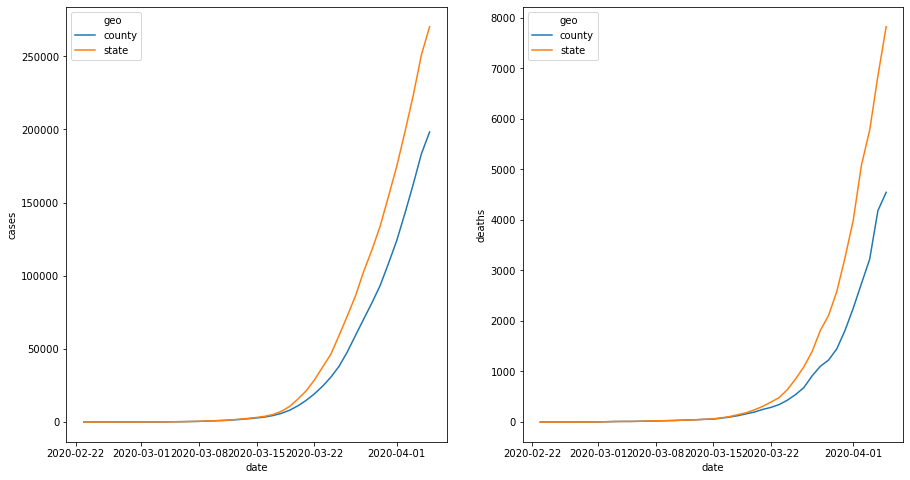

In [35]:
plt_data = full_data.groupby(['geo','date'])['cases','deaths'].sum().reset_index()
f, ax = plt.subplots(1,2,sharex=True,figsize=(15,8))
sns.lineplot(x='date',y='cases',hue='geo',data=plt_data,ax=ax[0])
sns.lineplot(x='date',y='deaths',hue='geo',data=plt_data,ax=ax[1])


# Lag mobility data

In [36]:
full_data.to_csv('data/compiled_{}'.format(str(datetime.datetime.now().date())),index=False)

In [37]:
full_data.columns.values

array(['country', 'region', 'date', 'asterisk_food_drugs',
       'asterisk_homes', 'asterisk_park', 'asterisk_shop',
       'asterisk_transit', 'asterisk_work', 'value_food_drugs',
       'value_homes', 'value_park', 'value_shop', 'value_transit',
       'value_work', 'source', 'State', 'Region', 'FIPS',
       'Population, 2014 estimate', 'Population, 2013 estimate',
       'Population, 2010 (April 1) estimates base',
       'Population, percent change - April 1, 2010 to July 1, 2014',
       'Population, percent change - April 1, 2010 to July 1, 2013',
       'Population, 2010', 'Persons under 5 years, percent, 2013',
       'Persons under 18 years, percent, 2013',
       'Persons 65 years and over, percent, 2013',
       'Female persons, percent, 2013', 'White alone, percent, 2013',
       'Black or African American alone, percent, 2013',
       'American Indian and Alaska Native alone, percent, 2013',
       'Asian alone, percent, 2013',
       'Native Hawaiian and Other Pacific I